In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import imblearn
from collections import Counter

In [2]:
files = glob('../Maisha_IDT_results/*__Slife.npz')
files.remove('../Maisha_IDT_results/Earth_TeqTsurf__Slife.npz')
files.remove('../Maisha_IDT_results/Earth_pH__Slife.npz')
files.remove('../Maisha_IDT_results/Moon__Slife.npz')
files

['../Maisha_IDT_results/GJ-1132b__Slife.npz',
 '../Maisha_IDT_results/TRAPPIST-1e__Slife.npz',
 '../Maisha_IDT_results/LHS-1140c__Slife.npz',
 '../Maisha_IDT_results/Mars__Slife.npz',
 '../Maisha_IDT_results/TRAPPIST-1g__Slife.npz',
 '../Maisha_IDT_results/Venus__Slife.npz',
 '../Maisha_IDT_results/Mercury__Slife.npz',
 '../Maisha_IDT_results/Simulated_01__Slife.npz',
 '../Maisha_IDT_results/LHS-1140b__Slife.npz',
 '../Maisha_IDT_results/TRAPPIST-1d__Slife.npz',
 '../Maisha_IDT_results/Europa2__Slife.npz',
 '../Maisha_IDT_results/K2-18b__Slife.npz',
 '../Maisha_IDT_results/Europa__Slife.npz',
 '../Maisha_IDT_results/Earth__Slife.npz',
 '../Maisha_IDT_results/TRAPPIST-1f__Slife.npz']

In [11]:
table = np.load(files[4])
print(table.files)


['Slife', 'SLsurf', 'SLsub', 'pnames', 'pvalues']


In [12]:
print(table['pnames'])


['Teff' 'age' 'Lx' 'Rs' 'loc' 'rho' 'Rp' 'Psurf' 'WMF' 'Tsurf' 'Teq'
 'Bfield' 'pH' 'sal' 'Aw']


In [13]:
print(table['pvalues'].shape)


(10000, 18)


In [14]:
print(table['Slife'].shape)
print(table['SLsurf'].shape)
print(table['SLsub'].shape)


(100,)
(100,)
(100,)


In [15]:
table['Slife']


array([94., 93., 96., 92., 93., 91., 98., 90., 94., 97., 91., 92., 98.,
       90., 94., 92., 93., 94., 92., 91., 95., 92., 95., 92., 97., 95.,
       91., 88., 92., 95., 90., 96., 92., 93., 91., 99., 94., 92., 94.,
       90., 97., 89., 93., 91., 91., 93., 91., 91., 96., 97., 96., 93.,
       93., 94., 93., 89., 95., 88., 91., 98., 94., 94., 88., 88., 96.,
       94., 93., 93., 96., 92., 89., 96., 95., 94., 95., 91., 91., 93.,
       95., 93., 89., 93., 95., 95., 91., 92., 91., 92., 96., 92., 88.,
       96., 94., 93., 92., 90., 89., 92., 92., 89.])

In [16]:
try:
    data_all
    del data_all
except:
    print('no data_all defined')
    
col = ['Teff', 'age', 'Lx', 'Rs', 'loc', 'Teq', 'Bfield', 'rho', 'Rp', 
       'Psurf', 'WMF', 'Tsurf', 'sal', 'pH', 'Aw', 'Life_Surf', 'Life_Sub', 'Life', 'Planet']


for i in range(len(files)):
    table = np.load(files[i])
    name = files[i].split('/')[-1].split('__')[0]
    col_table = np.concatenate([table['pnames'],['Life_Surf','Life_Sub', 'Life']])

    data = pd.DataFrame(data=table.f.pvalues, columns=col_table)
    data['Planet'] = [name]*len(data)
    data=data[col]
    print(name, len(col_table),data.shape)
    try:
        data_all
        print("ok")
        data_all = pd.concat([data_all,data])
        print(data_all.shape)
    except:
        data_all = data.copy()

data_all = data_all.reset_index(drop=True)
print(data_all.shape)


no data_all defined
GJ-1132b 18 (10000, 19)
TRAPPIST-1e 18 (10000, 19)
ok
(20000, 19)
LHS-1140c 18 (10000, 19)
ok
(30000, 19)
Mars 18 (10000, 19)
ok
(40000, 19)
TRAPPIST-1g 18 (10000, 19)
ok
(50000, 19)
Venus 18 (10000, 19)
ok
(60000, 19)
Mercury 18 (10000, 19)
ok
(70000, 19)
Simulated_01 18 (10000, 19)
ok
(80000, 19)
LHS-1140b 18 (10000, 19)
ok
(90000, 19)
TRAPPIST-1d 18 (10000, 19)
ok
(100000, 19)
Europa2 18 (10000, 19)
ok
(110000, 19)
K2-18b 18 (10000, 19)
ok
(120000, 19)
Europa 18 (10000, 19)
ok
(130000, 19)
Earth 18 (10000, 19)
ok
(140000, 19)
TRAPPIST-1f 18 (10000, 19)
ok
(150000, 19)
(150000, 19)


In [20]:
data_all['Life_4comb'] = np.zeros(len(data_all))
f_nA_nB = (data_all['Life_Surf'] == 0) & (data_all['Life_Sub'] == 0) #0
f_nA_yB = (data_all['Life_Surf'] == 0) & (data_all['Life_Sub'] == 1) #1
f_yA_nB = (data_all['Life_Surf'] == 1) & (data_all['Life_Sub'] == 0) #2
f_yA_yB = (data_all['Life_Surf'] == 1) & (data_all['Life_Sub'] == 1) #3
data_all.loc[f_nA_yB,'Life_4comb']=1
data_all.loc[f_yA_nB,'Life_4comb']=3 # THIS CASE DOES NOT EXIST IN THE DATASET
data_all.loc[f_yA_yB,'Life_4comb']=2

print("No Life above; No Life Below: {}".format(len(data_all[f_nA_nB])))
print("No Life above; Yes Life Below: {}".format(len(data_all[f_nA_yB])))
print("Yes Life above; No Life Below: {}".format(len(data_all[f_yA_nB])))
print("Yes Life above; Yes Life Below: {}".format(len(data_all[f_yA_yB])))
print("")
print("Yes Life: {}".format(len(data_all[(data_all['Life'] == 1)])))
print("No Life: {}".format(len(data_all[(data_all['Life'] == 0)])))
print("NaN Life (????): {}".format(len(data_all[np.isnan(data_all['Life'])])))


No Life above; No Life Below: 48699
No Life above; Yes Life Below: 81056
Yes Life above; No Life Below: 0
Yes Life above; Yes Life Below: 10427

Yes Life: 91483
No Life: 48699
NaN Life (????): 9818


In [21]:
data_all[np.isnan(data_all['Life'])].Life_4comb

10        0.0
52        0.0
95        0.0
98        0.0
113       0.0
         ... 
139966    0.0
139978    0.0
139986    0.0
139996    0.0
139998    0.0
Name: Life_4comb, Length: 9818, dtype: float64

In [7]:
data_all.to_csv('../tables/data_all.csv', index=False)

/Users/lspina/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:834: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lspina/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:835: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


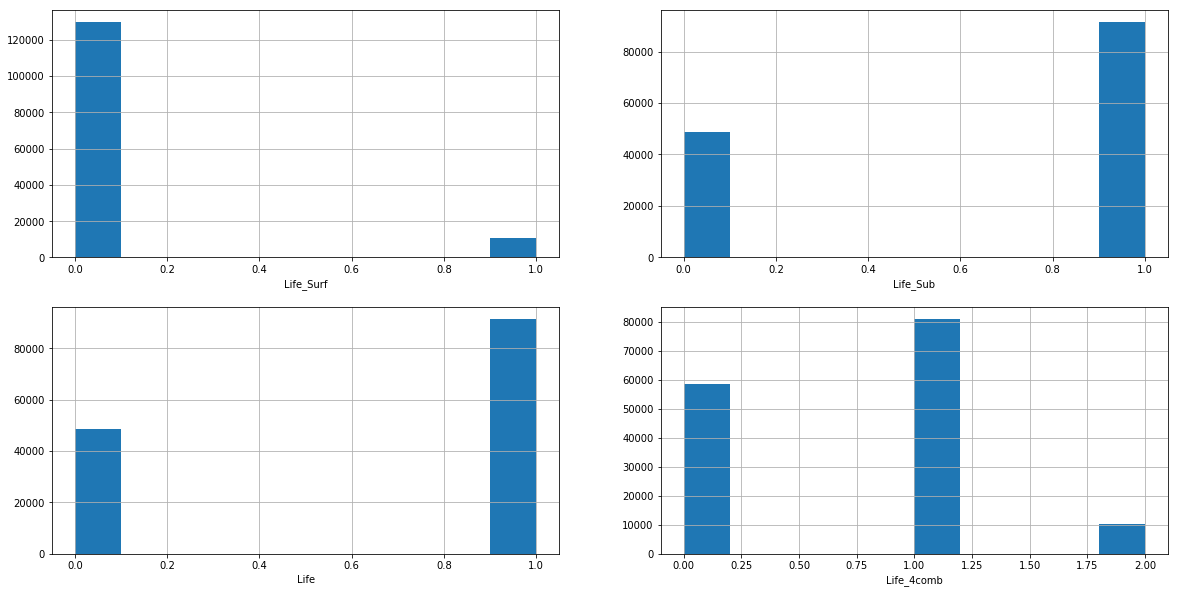

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(221)
h = plt.hist(data_all['Life_Surf'])
plt.xlabel('Life_Surf')
plt.grid()

plt.subplot(222)
h = plt.hist(data_all['Life_Sub'])
plt.xlabel('Life_Sub')
plt.grid()

plt.subplot(223)
h = plt.hist(data_all['Life'])
plt.xlabel('Life')
plt.grid()

plt.subplot(224)
h = plt.hist(data_all['Life_4comb'])
plt.xlabel('Life_4comb')
plt.grid()


In [119]:
col = ['Teff', 'age', 'Lx', 'Rs', 'loc', 'Teq', 'Bfield', 'rho', 'Rp', 
       'Psurf', 'WMF', 'Tsurf', 'sal', 'pH', 'Aw']
X = data_all[col].values
y = data_all['Life_4comb']
print(sorted(Counter(y).items()))

[(0.0, 58517), (1.0, 81056), (2.0, 10427)]


In [ ]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = under.fit_resample(X, y)